# Task 1
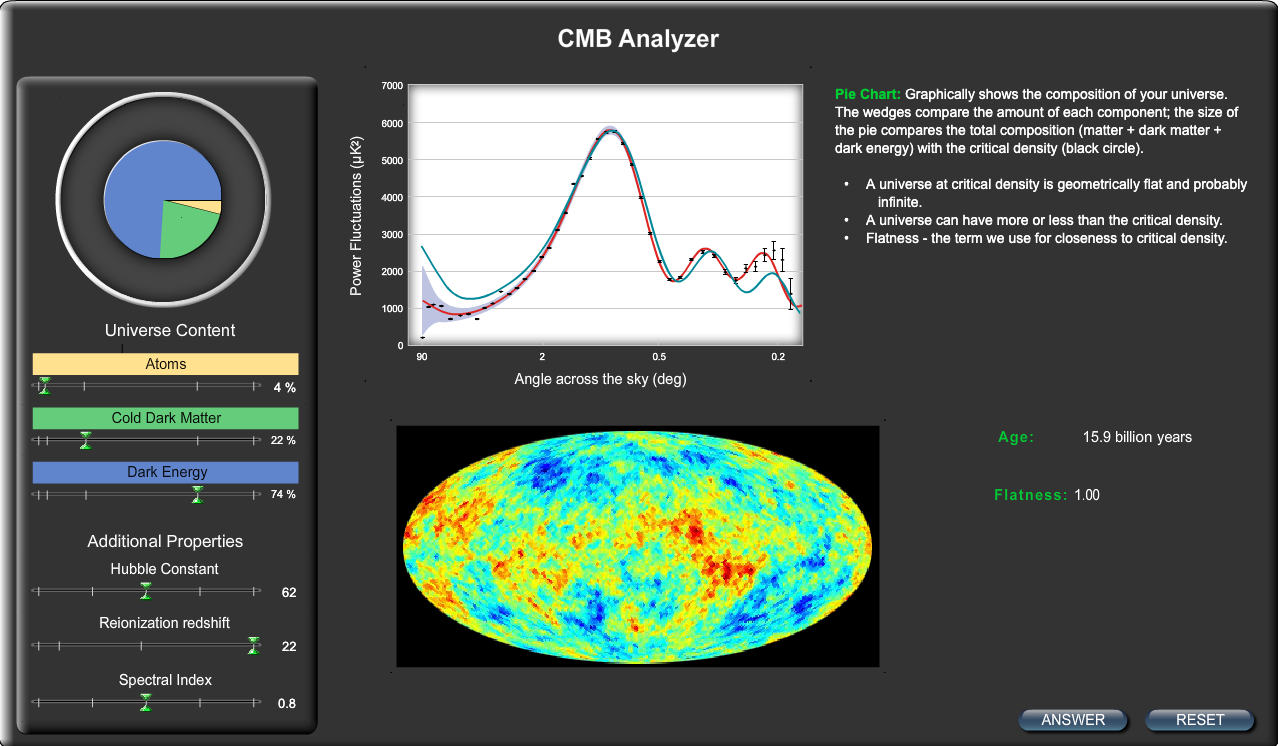

Best fit parameters:
* Atoms: 4%
* CDM: 22%
* DE: 74%
* Hubble Constant: 62
* Reionization redshift: 22
* Spectral Index: 0.08

# Task 2

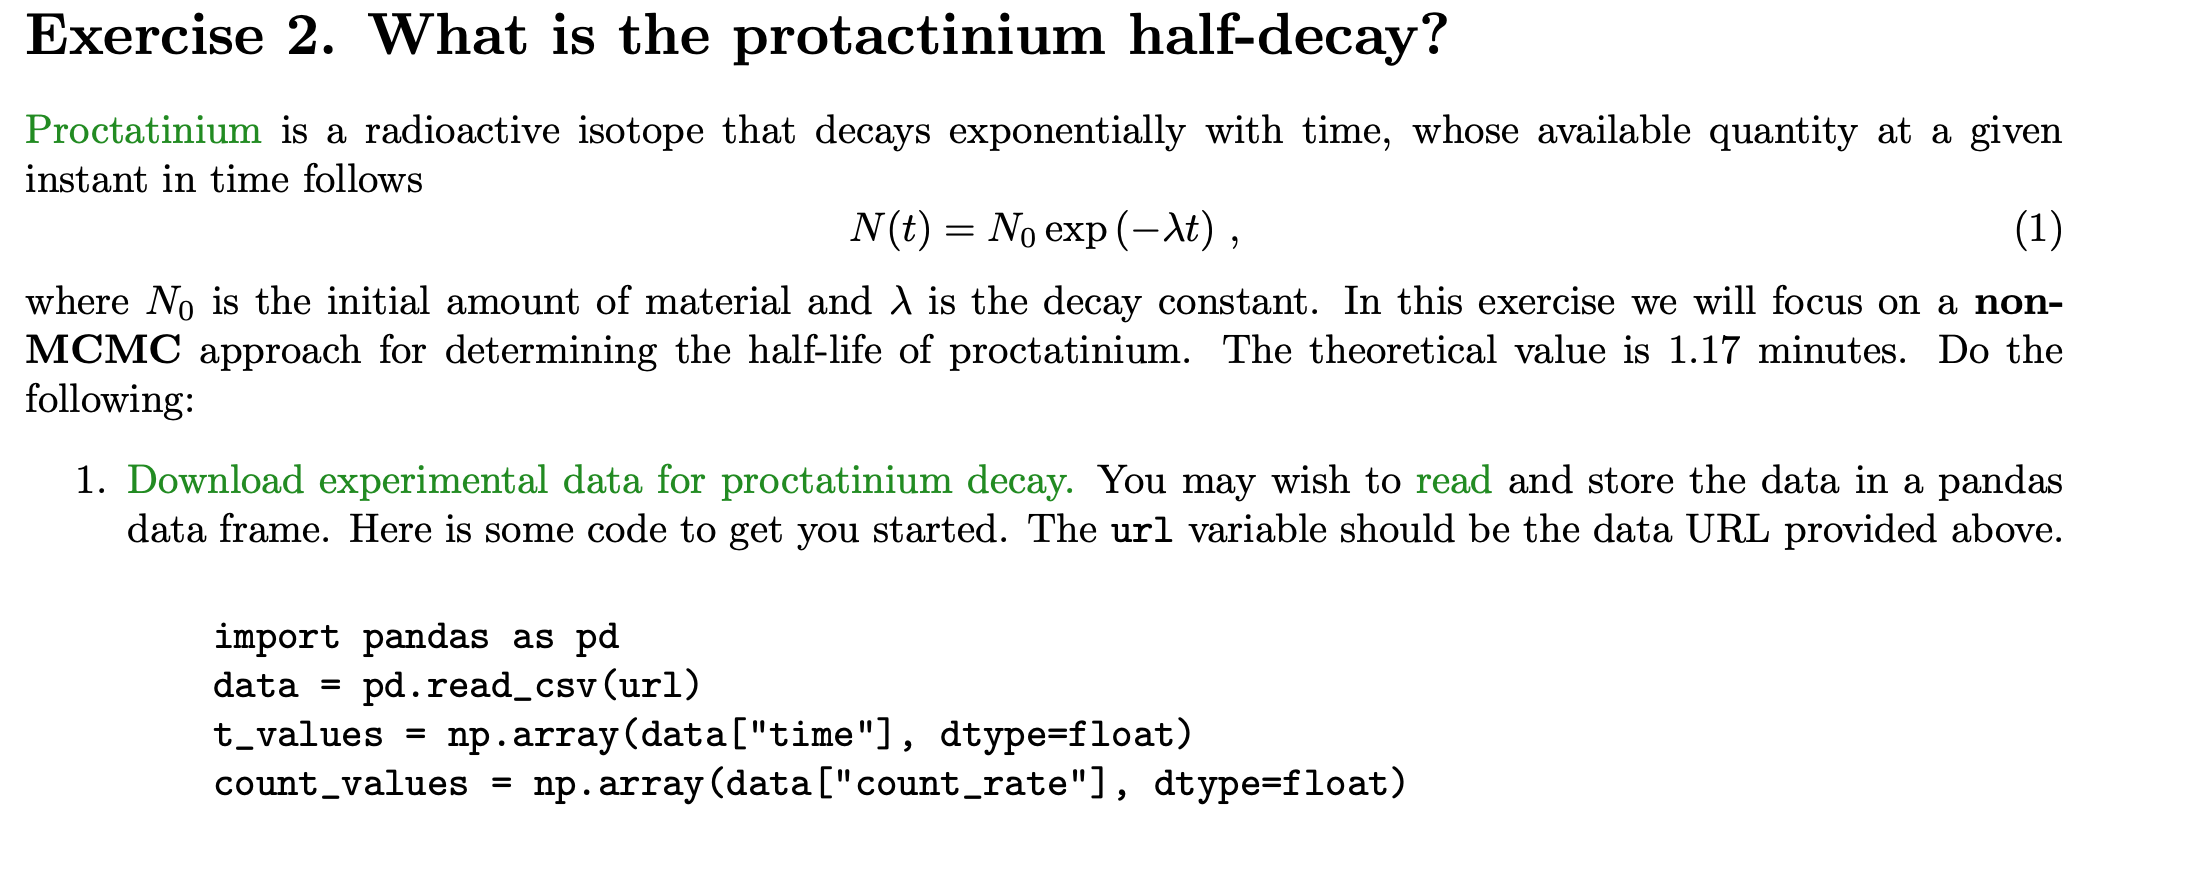

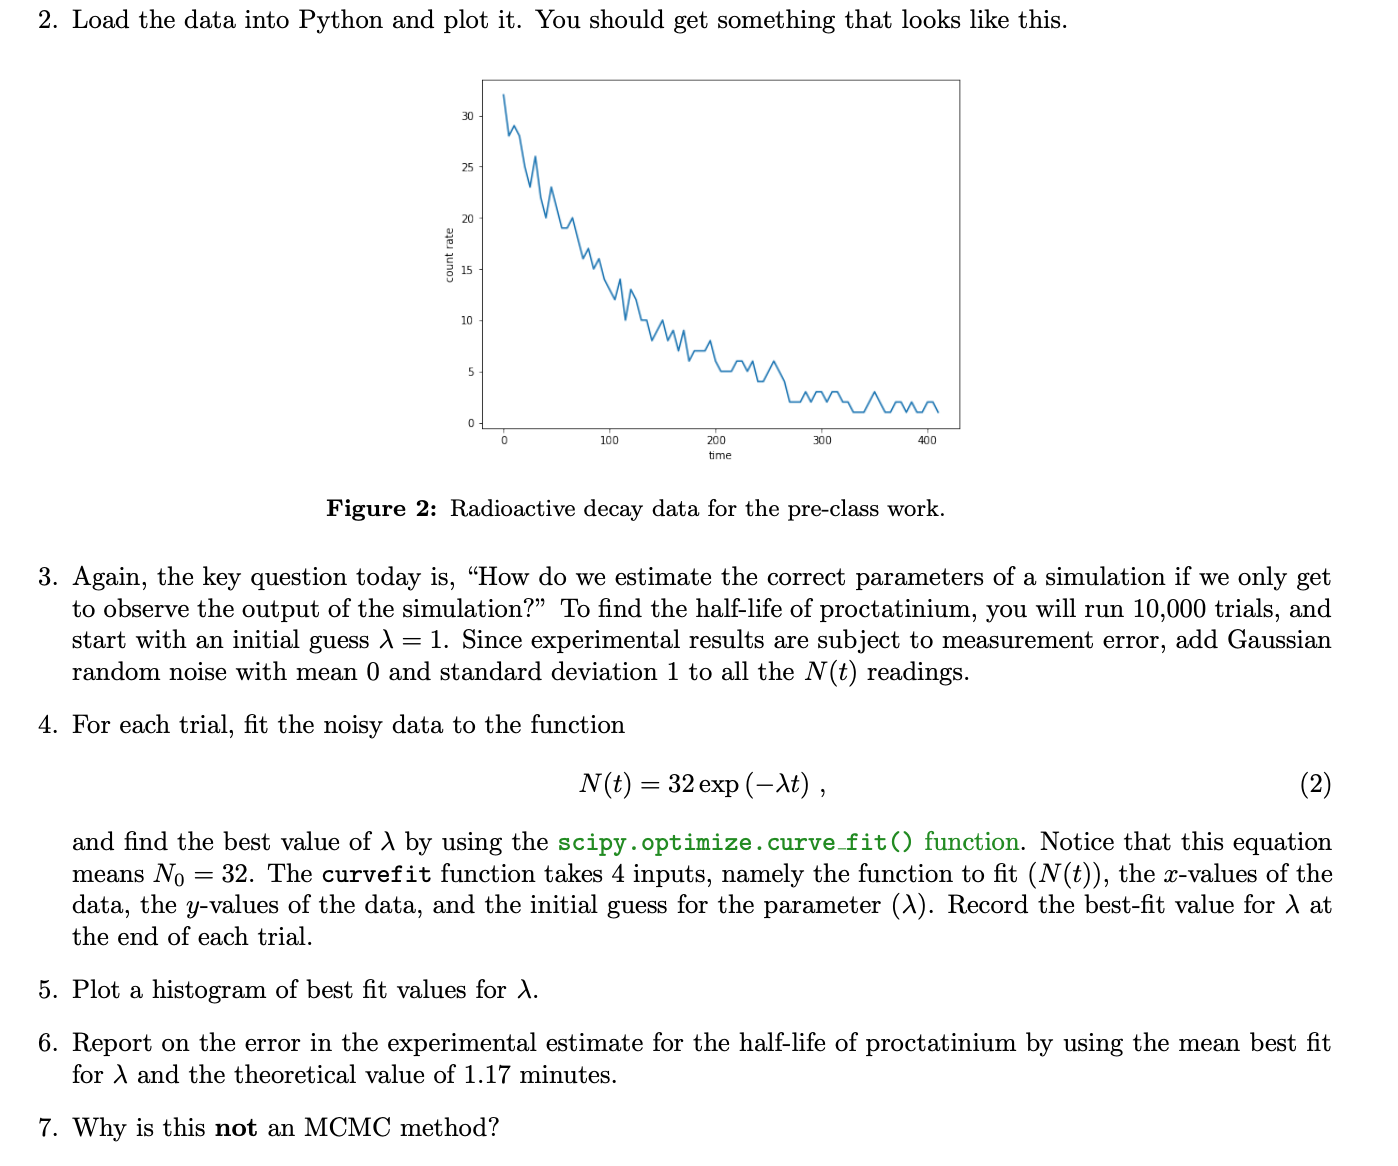

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
#Download Data
data = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/\
7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")

data.head() #See it looks right

,time,count_rate
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25


In [5]:
type(data["time"][1]) #Check its an int type

numpy.int64

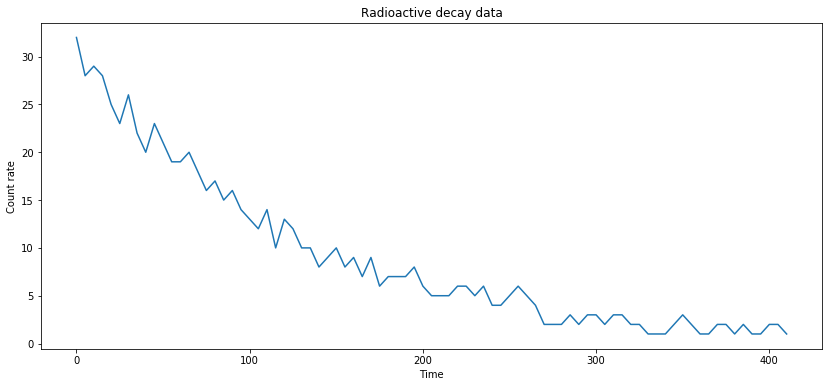

In [7]:
# Reproduce plot form PCW
plt.figure(figsize=(14,6))
plt.plot(data["time"], data["count_rate"])
plt.title("Radioactive decay data")
plt.xlabel("Time")
plt.ylabel("Count rate")
plt.show()

In [17]:
#Plot looks right, let's fit an exponential to it

#Initialize lambda and storage
optimal_param = []
lmbda = 1

#Define N(t) from the PCW
N = lambda t,lmbda: 32 * np.exp(-lmbda*t)

#For 1000 steps, add noise to the observation and fit lambda
for _ in range(10**3):
    #Add N(0, 1) noise to each observation
    noised_data = data["count_rate"] + np.random.normal(0, 1)
    
    #Fit lambda to data and store resulting lambda in optimal param
    optimal_param.append(optimize.curve_fit(N, data["time"], noised_data)[0][0])

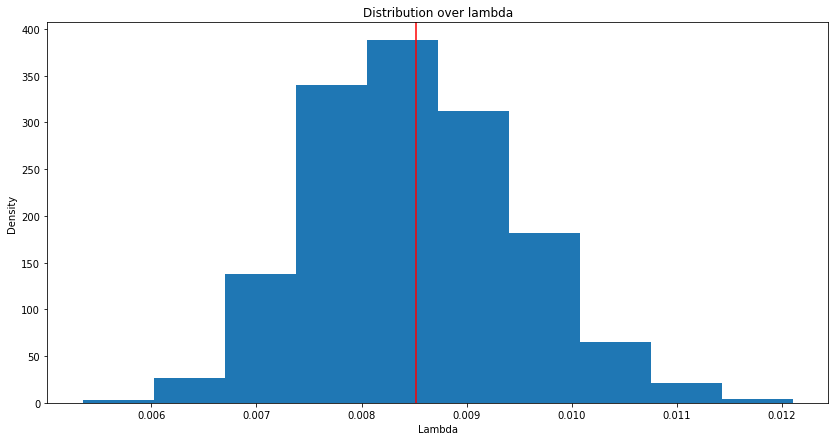

In [18]:
#Plot distribution over lambda
plt.figure(figsize=(14, 7))
plt.title("Distribution over lambda")
plt.hist(optimal_param, density=True) #Normalize to make PDF
plt.axvline(np.mean(optimal_param), color='red') #Draw vertical line at MLE
plt.xlabel('Lambda')
plt.ylabel('Density')
plt.show()

In [23]:
#The theoretical half-life of proctatinium is 70.2 seconds

#Using Eq.2 Half-life formula from study guide
experimental_half_life = (np.log(2) / np.mean(optimal_param)) 

print('Theoretical half-life: ', 70.2,
      '\nExperimental half-life: ', round(exp_half_life, 1),
      '\nError (seconds): ', round(abs(exp_half_life - 70.2), 1))

Theoretical half-life:  70.2 
Experimental half-life:  81.4 
Error (seconds):  11.2


This is not an MCMC method because we are at no point proposing and rejecting samples. Rather, we are repeatedly resampling our data and sparkling some noise on top to account for measurement error–it feels kinda bootstrappy.